# Car Price Prediction

**Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Data ingestion**

In [2]:
# Reading the csv file
df=pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Understanding the structure of the data**

In [4]:
# Number of rows and columns 
df.shape

(205, 26)

In [5]:
# Info on Non-Null Count and data type for each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# Columns gives all the featues name
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
# Describe gives the statistical inference of numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [8]:
# duplicate values in each column
df.duplicated().sum()

0

In [9]:
# unique values in each column
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [10]:
# Calculate memory usage in megabytes
memory_mb = df.memory_usage(deep=True).sum() / (1024 * 1024)  # Convert bytes to megabytes

print(f"Memory usage of the DataFrame: {memory_mb:.2f} MB")

Memory usage of the DataFrame: 0.15 MB


In [11]:
# Featues that are categirical
cat_feature = [ features for features in df.columns if df[features].dtype == "O"]
cat_feature

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [12]:
# Featues that are numerical
numeric_feature = [ features for features in df.columns if df[features].dtype != "O"]
numeric_feature

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

**Data Cleaning and Preparation**

In [13]:
#Splitting company name from CarName column
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
CompanyName

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [14]:
# Adding a new column 'CompanyName'
df.insert(3,"CompanyName",CompanyName)
df.head(2)

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [15]:
# Dropping the 'CarName' column
df.drop(['CarName'],axis=1,inplace=True)
df.head(2)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [16]:
# checking for the unique values in 'CompanyName'
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [17]:
# Changing the 'CompanyName' vaules into lowercase
df.CompanyName = df.CompanyName.str.lower()
df.head(2)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [18]:
# Replacing the misspelled vales withe the correct ones
def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique().sum()

'alfa-romeroaudibmwchevroletdodgehondaisuzujaguarmazdabuickmercurymitsubishinissanpeugeotplymouthporscherenaultsaabsubarutoyotavolkswagenvolvo'

In [19]:
df.nunique()

car_ID              205
symboling             6
CompanyName          22
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

**Plot for Distribution and Spread of target feature**

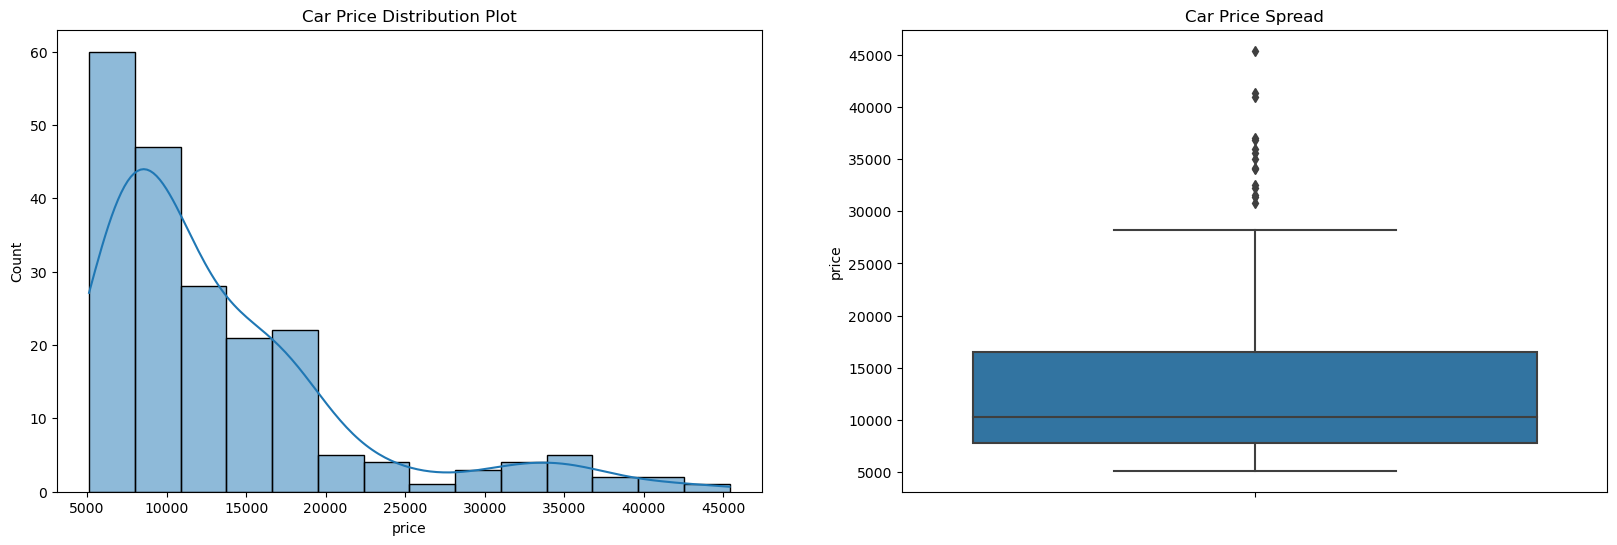

In [20]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(df.price,kde=True)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

In [21]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

**Visualization of categorical features** 

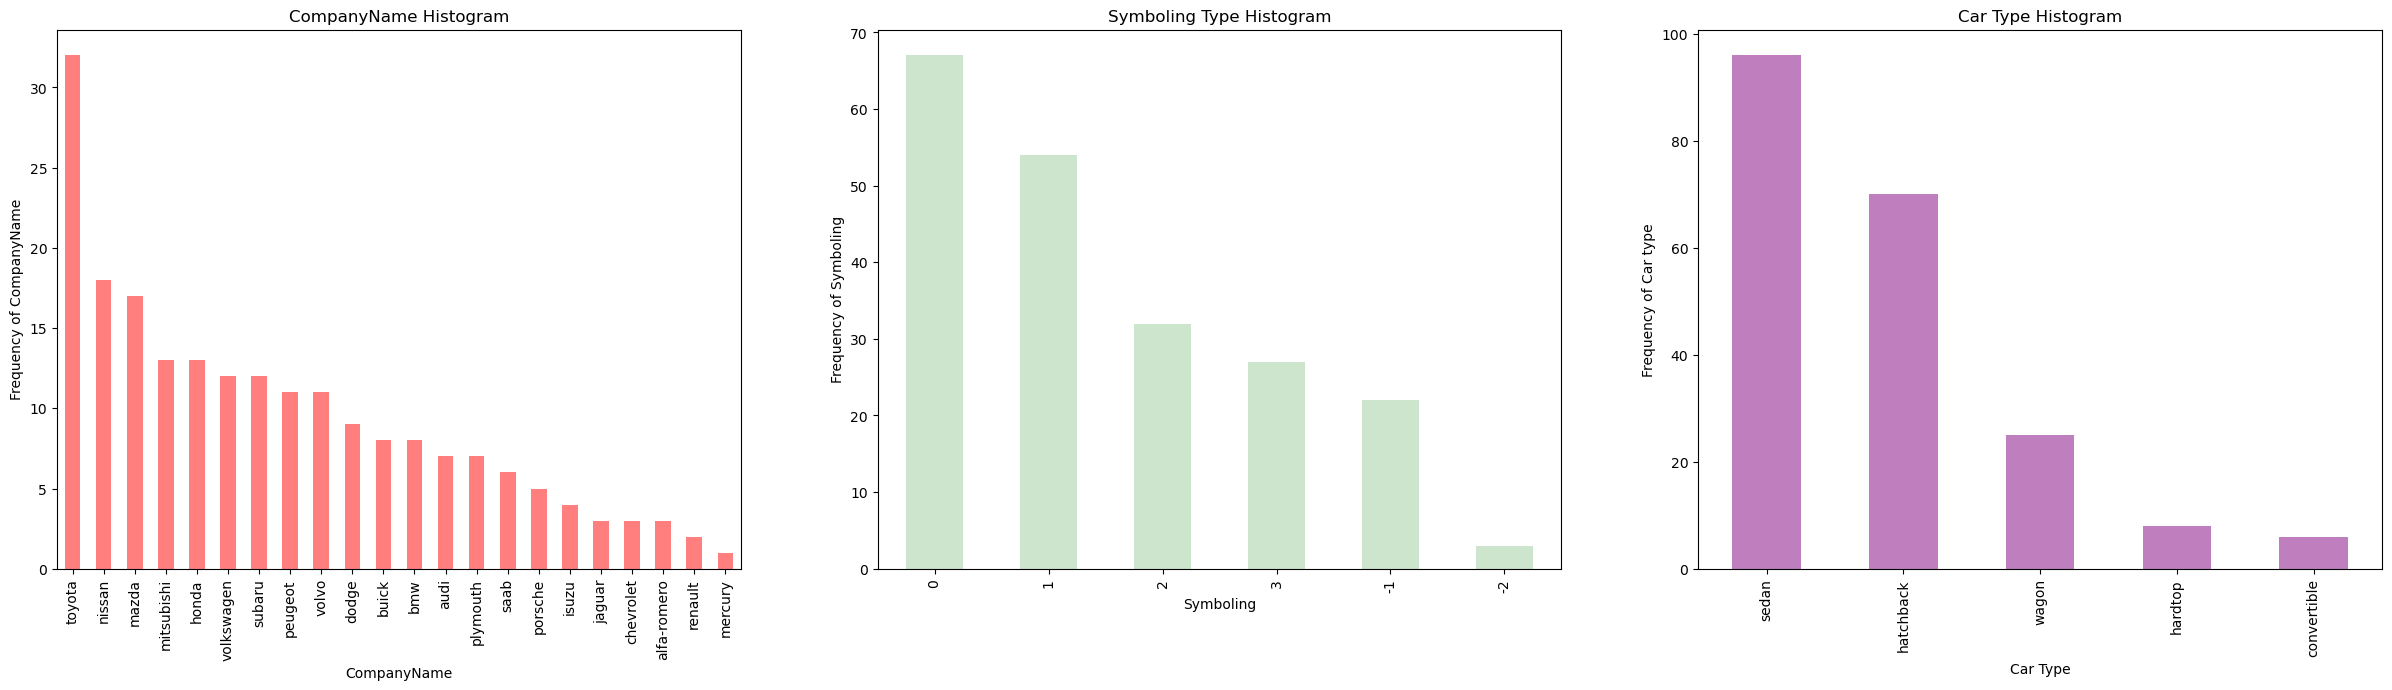

In [22]:
# Count plot
plt.figure(figsize=(30, 7))

plt.subplot(1,3,1)
plt1 = df.CompanyName.value_counts().plot(kind='bar', color='red',alpha=0.5)
plt.title('CompanyName Histogram')
plt1.set(xlabel = 'CompanyName', ylabel='Frequency of CompanyName')

plt.subplot(1,3,2)
plt1 = df.symboling.value_counts().plot(kind='bar', color='green',alpha=0.2)
plt.title('Symboling Type Histogram')
plt1.set(xlabel = 'Symboling', ylabel='Frequency of Symboling')

plt.subplot(1,3,3)
plt1 = df.carbody.value_counts().plot(kind='bar',color='purple',alpha=0.5)
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()



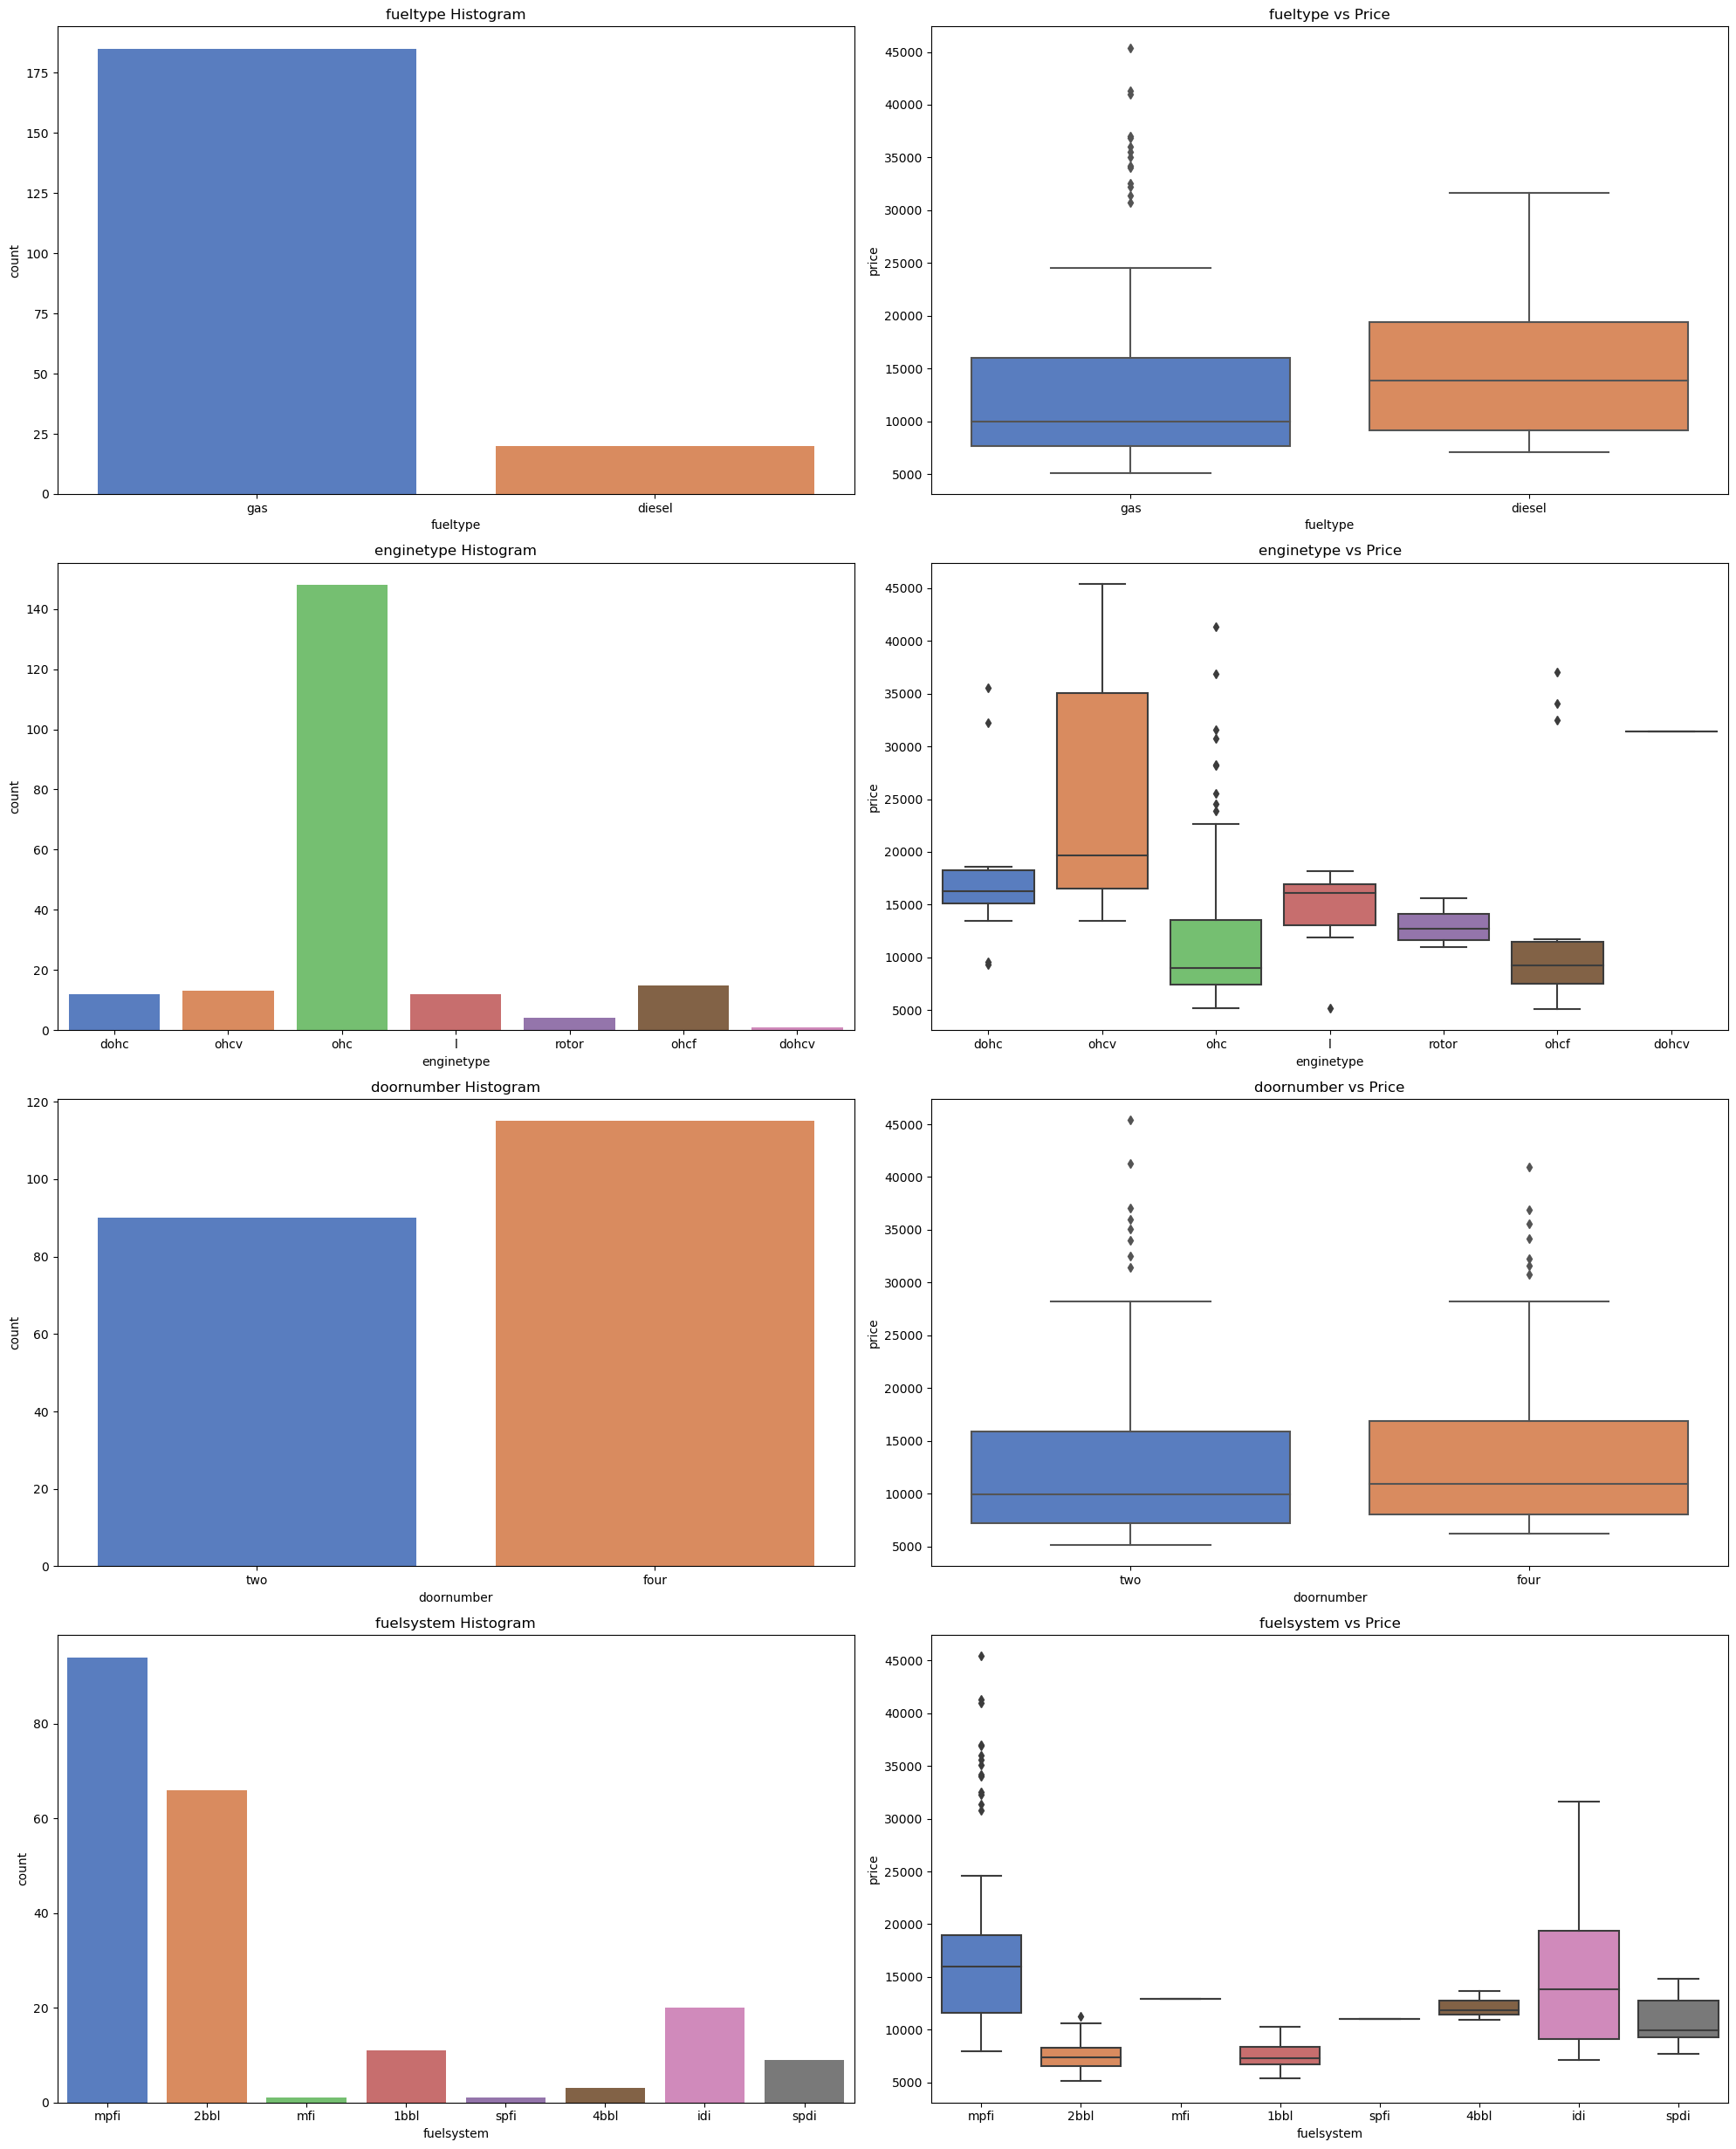

In [23]:
def plot_count_box(x,fig):
    plt.subplot(9,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(data=df,x=x,palette=("muted"))
    plt.subplot(9,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=df[x], y=df.price, palette=("muted"))
    
plt.figure(figsize=(20,55))


plot_count_box('fueltype',1)
plot_count_box('enginetype',3)
plot_count_box('doornumber',5)
plot_count_box('fuelsystem', 7)

plt.tight_layout()

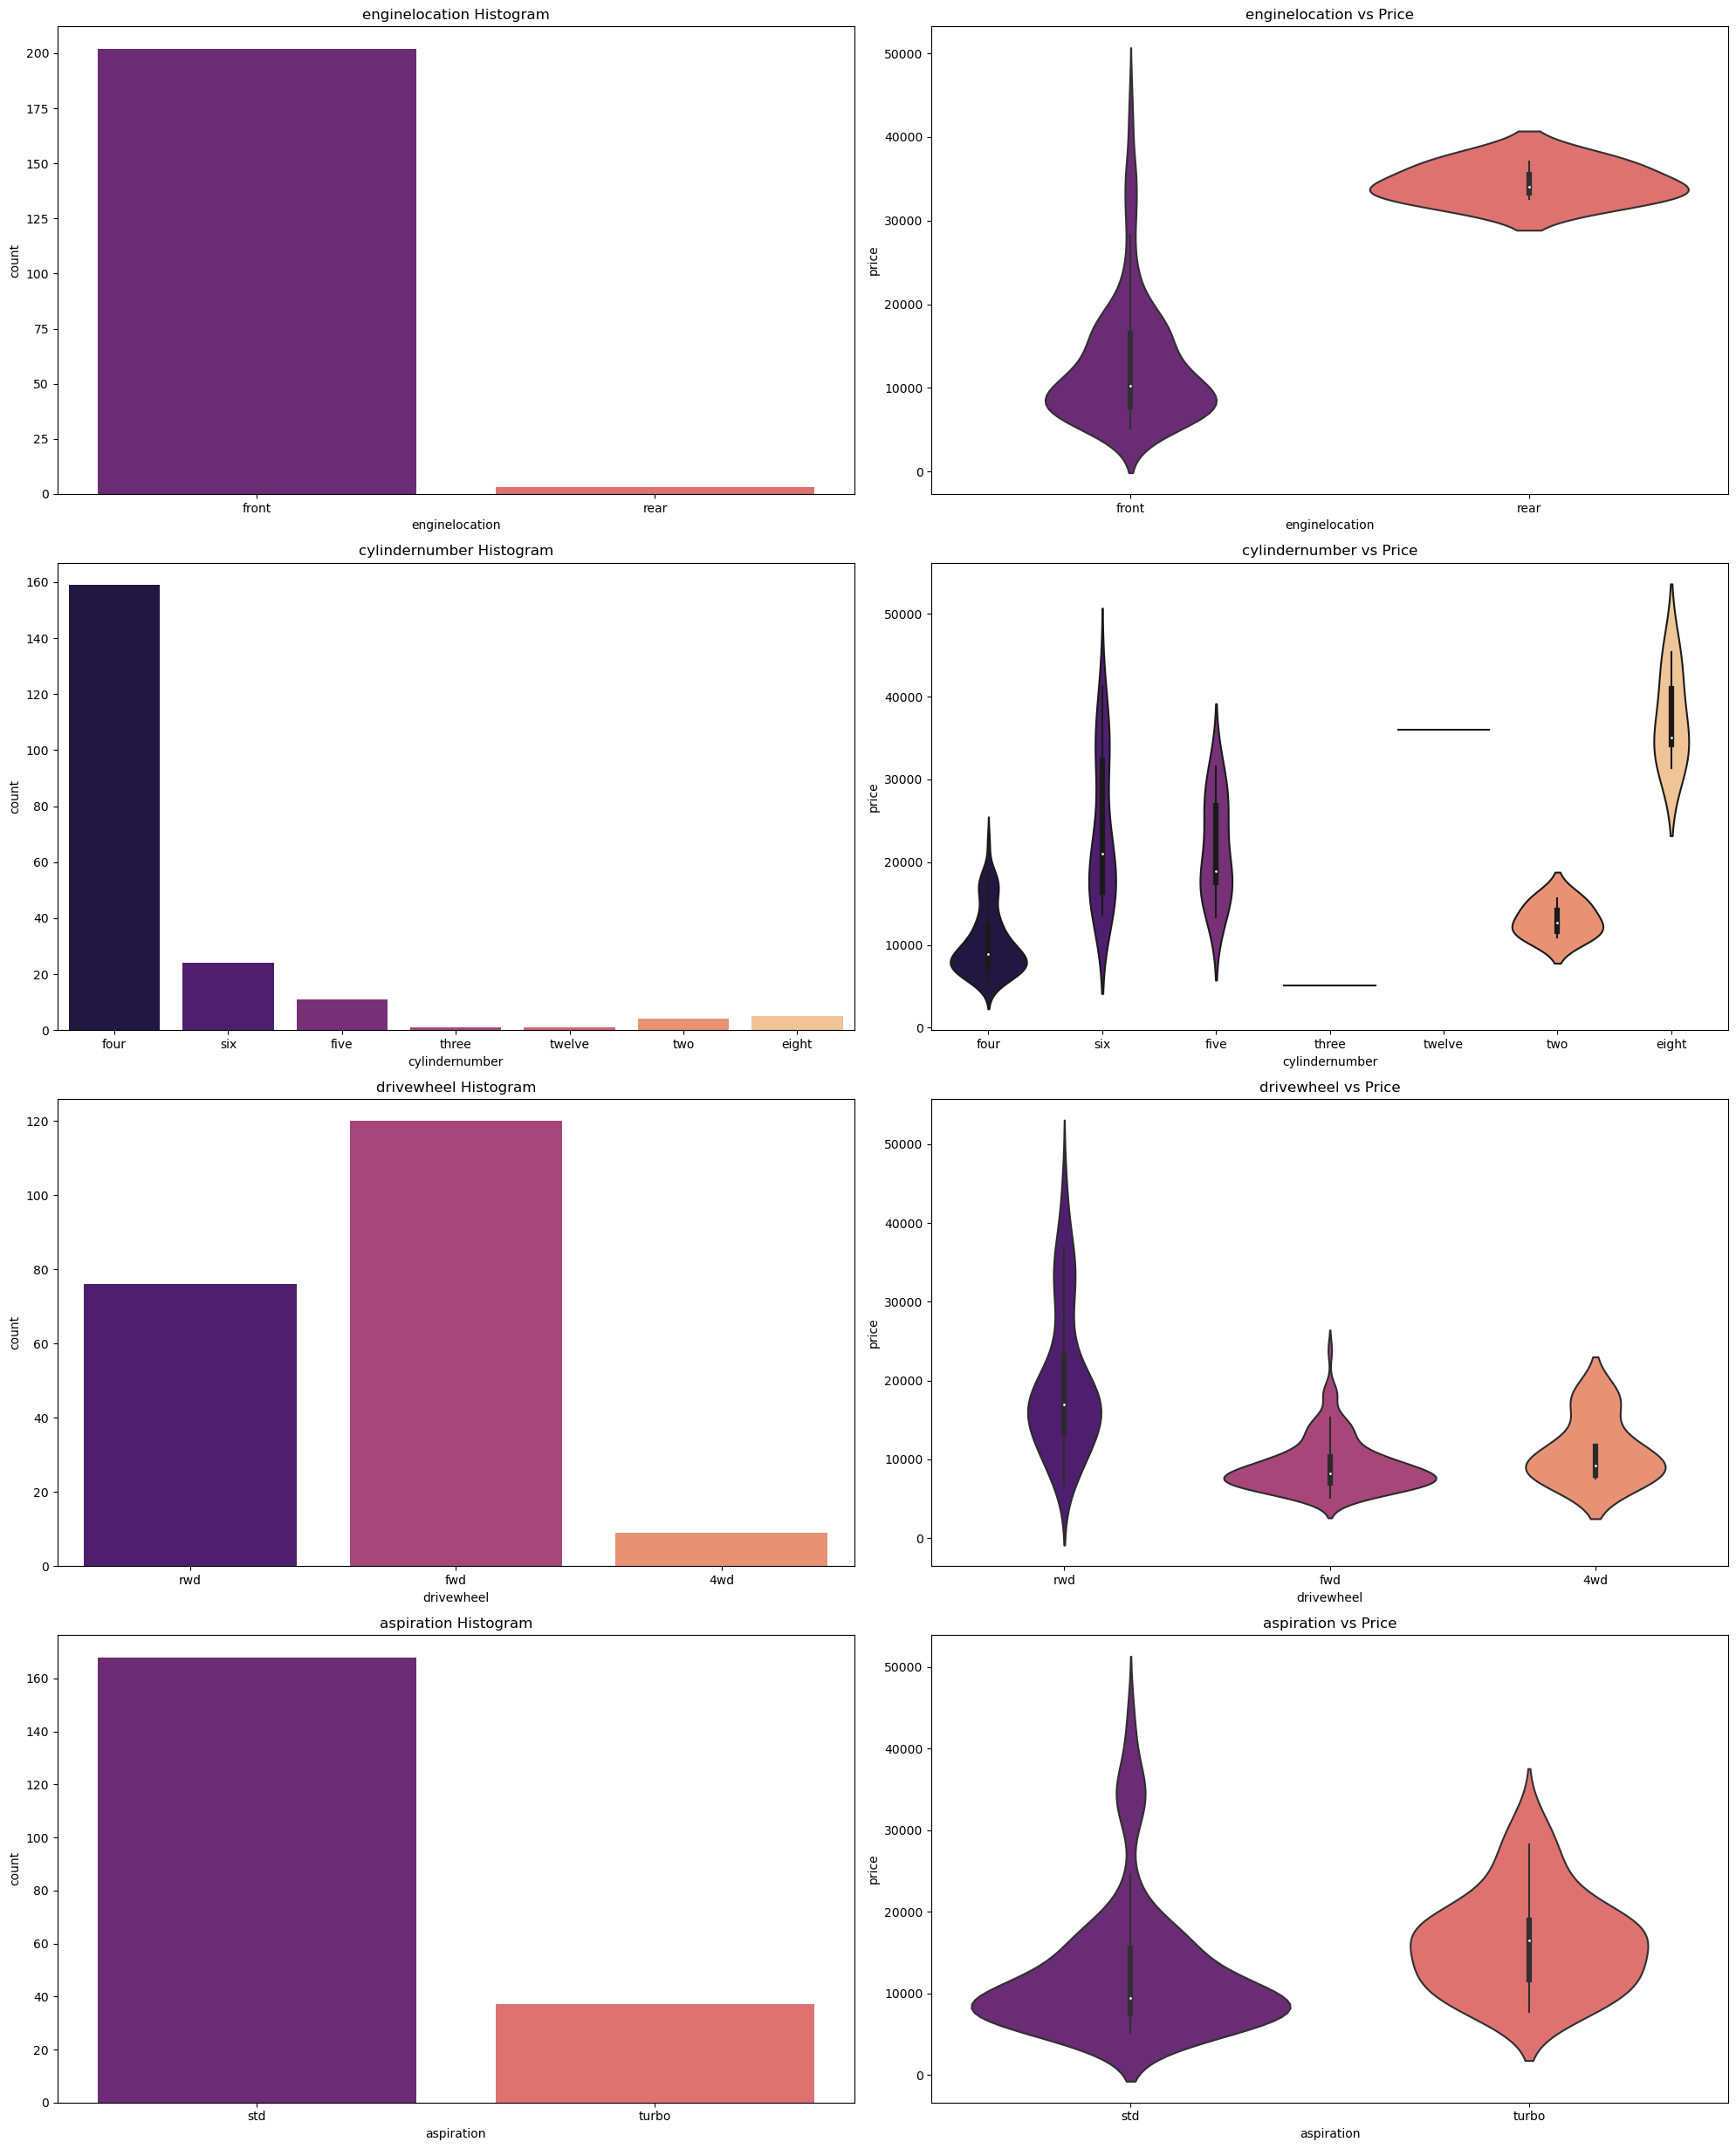

In [24]:
def plot_count_violin(x,fig):
    plt.subplot(9,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(data=df,x=x,palette=("magma"))
    plt.subplot(9,2,(fig+1))
    plt.title(x+' vs Price')
    sns.violinplot(x=df[x], y=df.price, palette=("magma"))
    
plt.figure(figsize=(20,55))

plot_count_violin('enginelocation', 1)
plot_count_violin('cylindernumber', 3)
plot_count_violin('drivewheel', 5)
plot_count_violin('aspiration',7)

plt.tight_layout()

We can understand some few things from these charts:

* In **fueltype** diesel is slitly expensive than gas 
* In **aspiration** turbo cars are more expensive
* **doornumbers** don't have a strong effect on price 
* All the types of **carbody** are cheaper as compared to convertible carbody
* The **rwd** is the most expensive drivewheel
* The cars with front **enginelocation** are way cheaper than cars with rear **enginelocation**.
* Enginetype **ohcv** has the highest price.
* The **cylindernumber** affect the price proportionaly

In [25]:
df.drop(columns=['CompanyName', 'doornumber', 'enginelocation', 'fuelsystem'], axis=1, inplace=True)

In [26]:
correlation = df.corr()
correlation

C:\Users\Dell\AppData\Local\Temp\ipykernel_14912\3035769115.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


We see that 'car_ID'(-0.109093) and 'symboling'(-0.079978) has no correlation with the target feature.

In [27]:
df.drop(columns=['car_ID','symboling'],  axis=1, inplace=True )

**Visualising numerical data** 

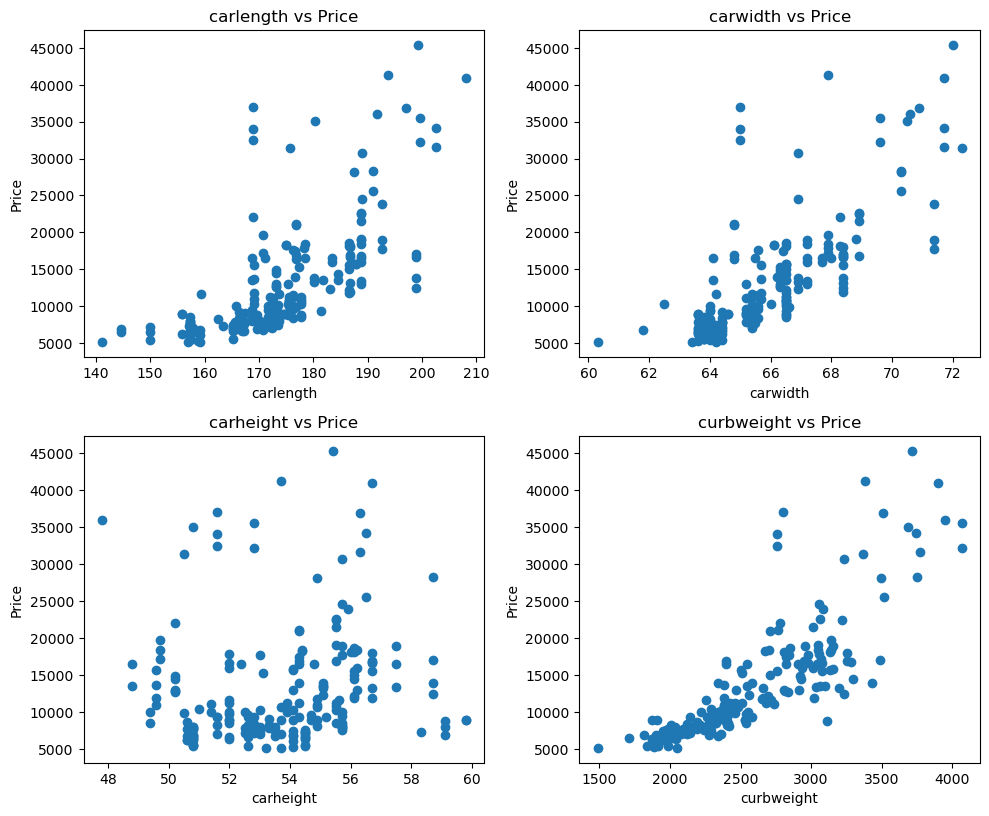

In [28]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

It is seen that 'carlength'(0.682920), 'carwidth'(0.759325), 'curbweight'(0.835305) are positively correlated and 'carheight'(0.119336) does not show any correlation WRT price.

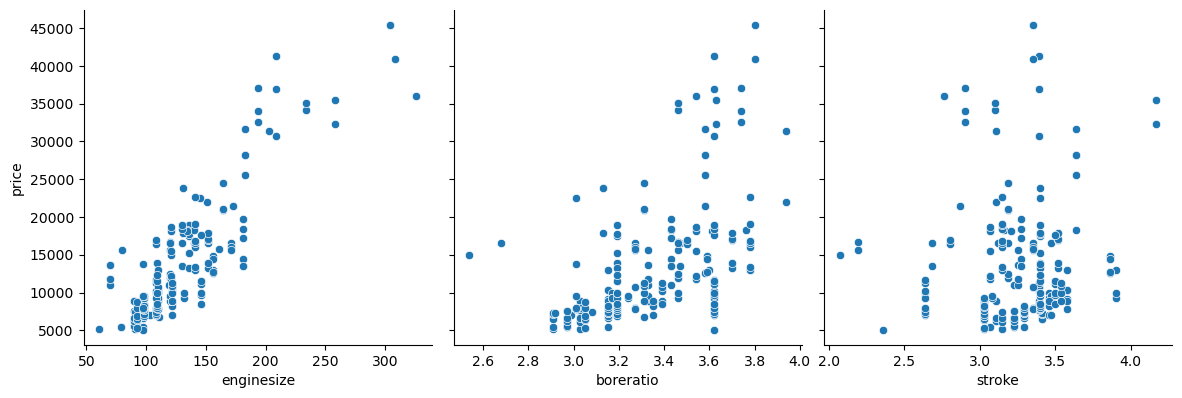

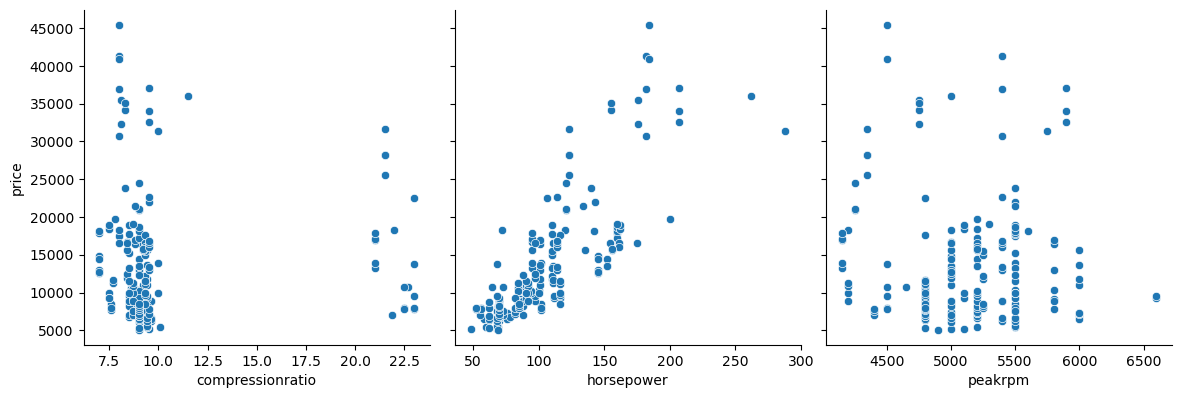

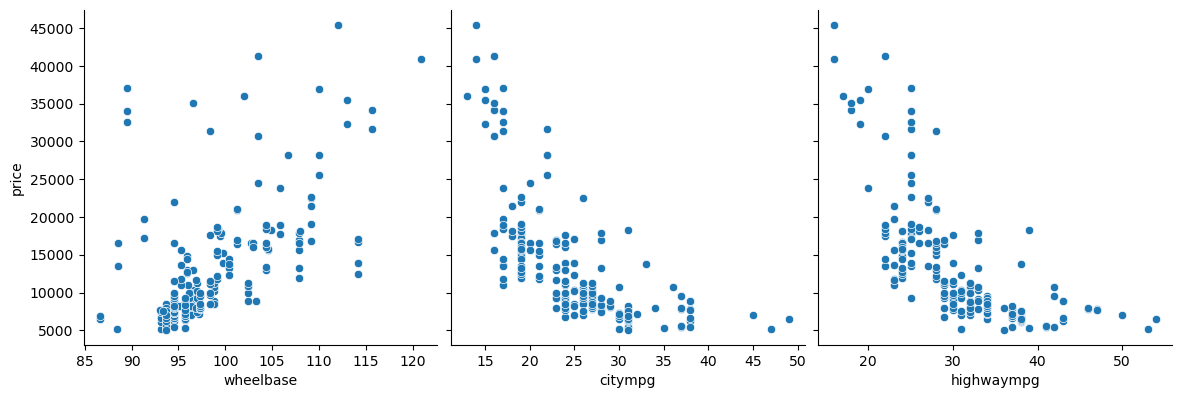

In [29]:
def pp(x,y,z):
    sns.pairplot(data=df, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

From the pair plots it is be seen how these features are correlated WRT target,
1. Positive correlatin -- 'enginesize'(0.874145), 'horsepower'(0.808139)
2. Negative correlation -- 'citympg'(-0.685751), 'highwaympg'(-0.697599)
3. Moderate correlation -- 'wheelbase'(0.577816), 'boreratio'(0.553173)
4. No correlation -- 'peakrpm'(-0.085267), 'compressionratio'(0.067984), 'stroke'(0.079443)

**Considering highly correlated features for feature selection.**

In [30]:
fea_with_corr=correlation['price'][abs(correlation['price']) > 0.50 ]
fea_with_corr

wheelbase     0.577816
carlength     0.682920
carwidth      0.759325
curbweight    0.835305
enginesize    0.874145
boreratio     0.553173
horsepower    0.808139
citympg      -0.685751
highwaympg   -0.697599
price         1.000000
Name: price, dtype: float64

In [31]:
# Select specific columns to create a new DataFrame
selected_columns = ['carlength', 'carwidth', 'curbweight', 'enginesize', 'wheelbase', 'boreratio', 'horsepower', 'citympg', 'highwaympg']

# Create a new DataFrame with the selected columns
new_df = df[selected_columns]

# Display the new DataFrame
new_df.head()

,carlength,carwidth,curbweight,enginesize,wheelbase,boreratio,horsepower,citympg,highwaympg
0,168.8,64.1,2548,130,88.6,3.47,111,21,27
1,168.8,64.1,2548,130,88.6,3.47,111,21,27
2,171.2,65.5,2823,152,94.5,2.68,154,19,26
3,176.6,66.2,2337,109,99.8,3.19,102,24,30
4,176.6,66.4,2824,136,99.4,3.19,115,18,22


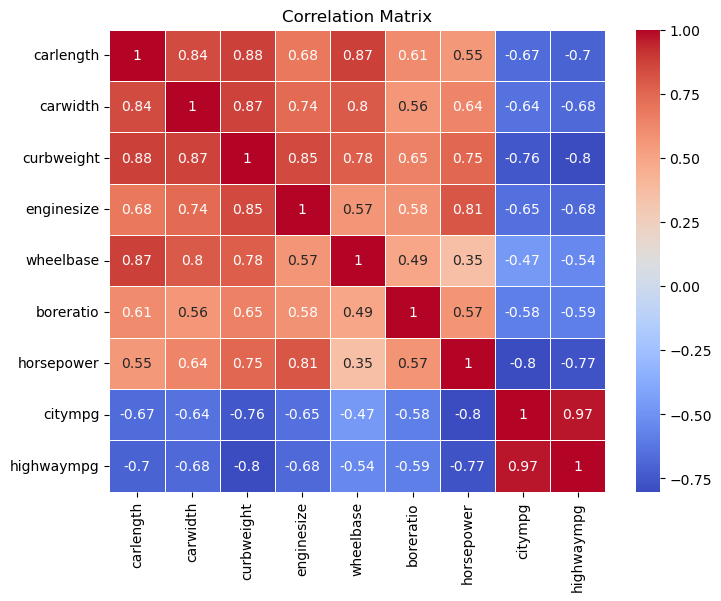

In [32]:
# Compute the correlation matrix
correlation_matrix = new_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Here we see that the 'citympg' and 'highwaympg' are highly correlated i.e., 0.97 .Hence we can drop one of the feature.

In [33]:
df.drop(columns=['carheight','peakrpm', 'compressionratio', 'stroke', 'highwaympg'], axis=1, inplace=True)

**Boxplot**

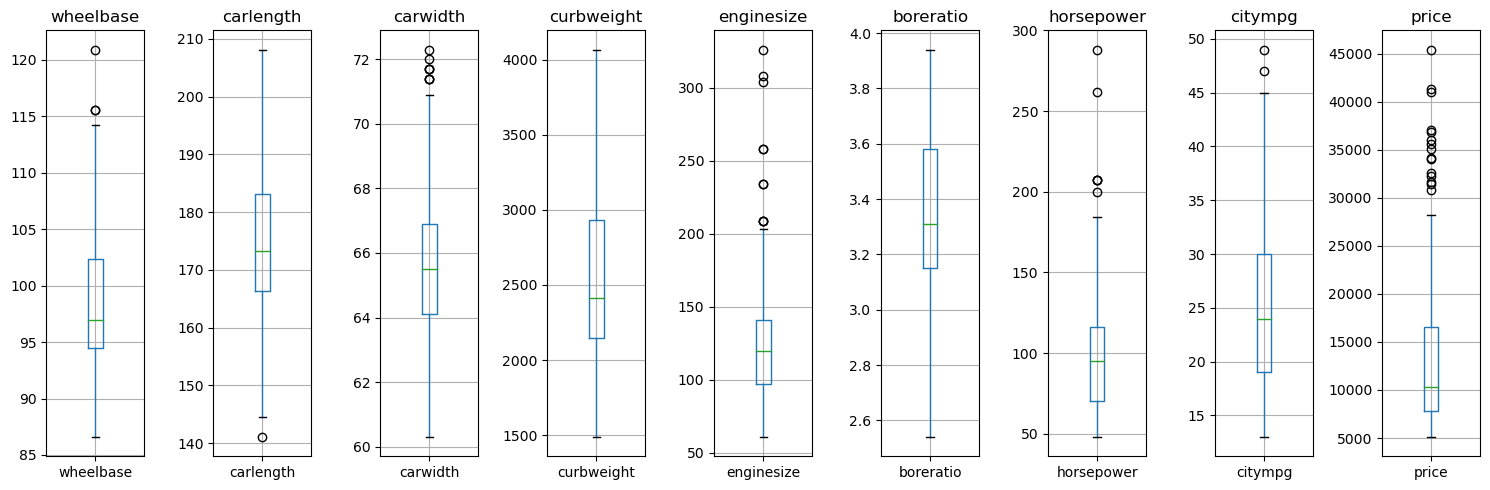

In [34]:
# Create subplots for box plots of all numerical features
num_cols = df.select_dtypes(include=['number']).columns  # Select numerical columns

num_features_count = len(num_cols)
fig, axes = plt.subplots(nrows=1, ncols=num_features_count, figsize=(15, 5))  # Adjust figsize as needed

# Loop through numerical columns and create box plots
for i, col in enumerate(num_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [35]:
Features_with_outliers = ['wheelbase', 'carlength', 'carwidth', 'enginesize', 'horsepower', 'citympg']

In [36]:
def count_outliers_iqr(data, multiplier=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    total = data[(data < lower_bound) | (data > upper_bound)].count()
   
    return total,lower_bound,upper_bound

In [37]:
for i in Features_with_outliers:
    outlier_count,lower_bound,upper_bound = count_outliers_iqr(df[i])
    print(f" Outliers {i} : {outlier_count}")
    

 Outliers wheelbase : 3
 Outliers carlength : 1
 Outliers carwidth : 8
 Outliers enginesize : 10
 Outliers horsepower : 6
 Outliers citympg : 2


Except 'curbweight' and 'boreratio' there are very few outliers in every feature.

**Handling outliers**

In [38]:
def remove_outliers_iqr(data):
    """
    Remove outliers from a numeric dataset using the IQR method.

    Parameters:
    data (list or numpy array): The dataset from which outliers need to be removed.

    Returns:
    cleaned_data (list or numpy array): The dataset with outliers removed.
    """
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    data = np.where(data>upper_bound, upper_bound, np.where(data<lower_bound,lower_bound,data))
   
    return data[(data >= lower_bound) & (data <= upper_bound)]


In [39]:
for column in Features_with_outliers:
    df[column] = remove_outliers_iqr(df[column])

In [40]:
df.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,price
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130.0,3.47,111.0,21.0,13495.0
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130.0,3.47,111.0,21.0,16500.0
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152.0,2.68,154.0,19.0,16500.0
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109.0,3.19,102.0,24.0,13950.0
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136.0,3.19,115.0,18.0,17450.0


**Encoding**

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
en = LabelEncoder()
cat_fea_selected=["enginetype","fueltype","aspiration","carbody","cylindernumber","drivewheel"]
for cols in cat_fea_selected:
    df[cols] = en.fit_transform(df[cols])

In [43]:
df.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,price
0,1,0,0,2,88.6,168.8,64.1,2548,0,2,130.0,3.47,111.0,21.0,13495.0
1,1,0,0,2,88.6,168.8,64.1,2548,0,2,130.0,3.47,111.0,21.0,16500.0
2,1,0,2,2,94.5,171.2,65.5,2823,5,3,152.0,2.68,154.0,19.0,16500.0
3,1,0,3,1,99.8,176.6,66.2,2337,3,2,109.0,3.19,102.0,24.0,13950.0
4,1,0,3,0,99.4,176.6,66.4,2824,3,1,136.0,3.19,115.0,18.0,17450.0


**Feature Engineering**

We Will Try and explore our data and create some new features to improve the model efficency

Let's Start and classify the Price: we create a new column form a range of scalars into a catagorical one and more easier column to interpret from it .

So we will create **priceCatagory** with 3 classes :

* Budget_Friendly
* Medium Range
* TopNotch Cars

In [44]:
df.loc[ df['price'] <= 20000, 'priceCatagory'] = 0
df.loc[(df['price'] > 20000) & (df['price'] <= 40000), 'priceCatagory'] = 1
df.loc[ df['price'] > 40000, 'priceCatagory'] = 2
df["priceCatagory"]=df["priceCatagory"].astype(int)

**Split the data into independent and dependent features**

In [45]:
X = df.drop("price",axis=1)
y = df["price"]

In [46]:
X

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,priceCatagory
0,1,0,0,2,88.6,168.8,64.1,2548,0,2,130.0,3.47,111.0,21.0,0
1,1,0,0,2,88.6,168.8,64.1,2548,0,2,130.0,3.47,111.0,21.0,0
2,1,0,2,2,94.5,171.2,65.5,2823,5,3,152.0,2.68,154.0,19.0,0
3,1,0,3,1,99.8,176.6,66.2,2337,3,2,109.0,3.19,102.0,24.0,0
4,1,0,3,0,99.4,176.6,66.4,2824,3,1,136.0,3.19,115.0,18.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,3,2,109.1,188.8,68.9,2952,3,2,141.0,3.78,114.0,23.0,0
201,1,1,3,2,109.1,188.8,68.8,3049,3,2,141.0,3.78,160.0,19.0,0
202,1,0,3,2,109.1,188.8,68.9,3012,5,3,173.0,3.58,134.0,18.0,1
203,0,1,3,2,109.1,188.8,68.9,3217,3,3,145.0,3.01,106.0,26.0,1


In [47]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

**Train Test split**

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

**Scaling**

In [50]:
from sklearn.preprocessing import StandardScaler

# Create a MinMaxScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

**LinearRegression**

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
regression=LinearRegression()

In [53]:
regression

LinearRegression()

In [54]:
# Training the data
regression.fit(X_train,y_train)

LinearRegression()

In [55]:
# print the coefficients 
print(regression.coef_)

[-1354.52692711 -1091.59925187  -508.15796253   136.89277359
   -62.5739921    594.02179365   220.27798594  2129.89931228
   345.7534648   -543.25774497 -1585.86739185    40.72933993
  3819.79358968  -297.18016858  3584.01119581]


In [56]:
# print the intercept
print(regression.intercept_)

13223.41463414634


In [57]:
# Prediction for the test data
reg_pred=regression.predict(X_test)

In [58]:
reg_pred

array([30370.97850451, 18737.00421774, 10111.73473298, 14638.38030074,
       30065.89861937,  6903.6593485 , 10358.67942202,  7082.34496195,
       10901.98908238, 10286.73851926, 13803.88147485,  8225.31605057,
       13969.84146496, 10716.0465634 , 47917.52262565,  5942.49437809,
          79.78826791, 14063.22897573,  9549.5266846 , 10883.81692734,
        9452.20745363, 17362.99718661,  7242.20971534,  2910.7212181 ,
        5957.29893879, 41718.82391535, 13669.53270156, 14818.09299453,
        5995.69358201, 14895.16320351, 29671.39420681,  6451.6918217 ,
        6403.72044767, 26569.20320484,  7989.87857498, 30627.60682529,
       10425.61142808, 12573.63487764,  5412.04246284, 14452.85349129,
        8766.25472991])

**Assumptions Of Linear Regression**

Text(0, 0.5, 'Test Predicted Data')

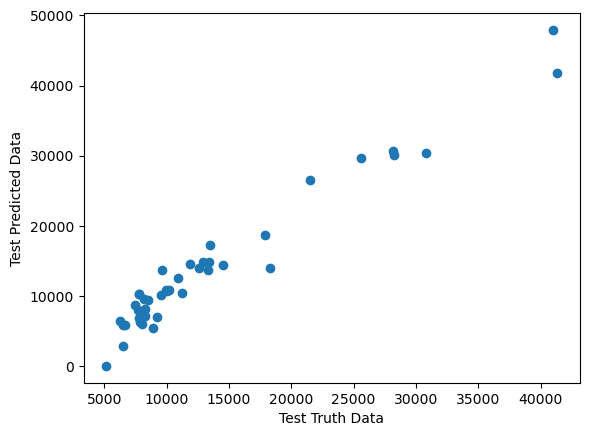

In [59]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [60]:
# Residuals
residuals=y_test-reg_pred

In [61]:
residuals

15      389.021495
9      -877.837218
100    -562.734733
132   -2788.380301
68    -1817.898619
95      895.340651
159   -2570.679422
162    2175.655038
147    -703.989082
182   -2511.738519
191    -508.881475
164      12.683949
65     4310.158535
175    -728.046563
73    -6957.522626
152     545.505622
18     5071.211732
82    -1434.228976
86    -1360.526685
143    -923.816927
60     -957.207454
101   -3863.997187
98     1006.790285
30     3568.278782
25      734.701061
16     -403.823915
168   -4030.532702
195   -1403.092995
97     2003.306418
194   -1955.163204
67    -4119.394207
120    -222.691822
154    1494.279552
202   -5084.203205
79     -300.878575
69    -2451.606825
145     833.388572
55    -1628.634878
45     3504.457537
84       36.146509
146   -1303.254730
Name: price, dtype: float64

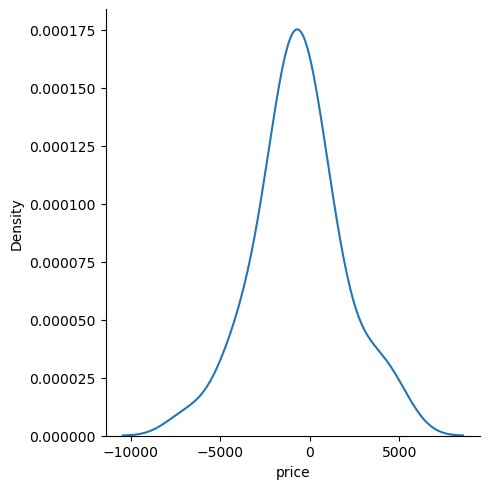

In [62]:
sns.displot(residuals,kind="kde")

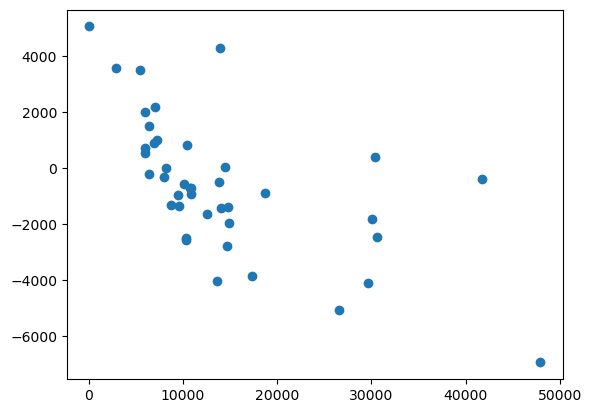

In [63]:
# SCatter plot with predictions and residual
# We must obtain uniform distribution
plt.scatter(reg_pred,residuals)

In [64]:
# Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

6211996.101309233
1903.6997215073054
2492.3876306283564


In [65]:
# R square
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.9213113794801661


In [66]:
# Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8740982071682657

In [68]:
# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training MSE:", mse_train)
print("Training R-squared:", r2_train)
print("Testing MSE:", mse_test)
print("Testing R-squared:", r2_test)


Training MSE: 3613646.0227562813
Training R-squared: 0.9394068232325898
Testing MSE: 6211996.101309233
Testing R-squared: 0.9213113794801661


It is seen that the linear regression model in neither overfitting nor underfitting, but a generilized model. Hence hyperparameters are not required.

## Conclusion

We finally got an r2 score of 92% using LinearRegression which is pretty impressive.